In [49]:
import glob
import numpy as np
import joblib
from tqdm import tqdm
import matplotlib.pyplot as plt
import rasterio

In [119]:
paths = glob.glob('./ensembles/*.pkl')
print(len(paths))

5


In [120]:
paths

['./ensembles\\246_512_803827_CWunet.pkl',
 './ensembles\\256_1024_256patch_861796.pkl',
 './ensembles\\321568p_512_finetune.pkl',
 './ensembles\\321568_512_846751.pkl',
 './ensembles\\356_512_835827.pkl']

In [121]:
pred = joblib.load(paths[0])
tests = list(pred.keys())
# list(pred.keys())[0]

In [150]:
res = {}
for key in tests:
    res[key] = np.zeros((256,256),dtype=np.uint8)
for path in tqdm(paths):
    pred = joblib.load(path)
    for key in list(pred.keys()):
        res[key] += pred[key]

100%|██████████| 5/5 [00:02<00:00,  2.06it/s]


In [151]:
th = 4
for key in tests:
    res[key] = np.array(res[key]>th,dtype=np.uint8)

Text(0.5, 0, '4')

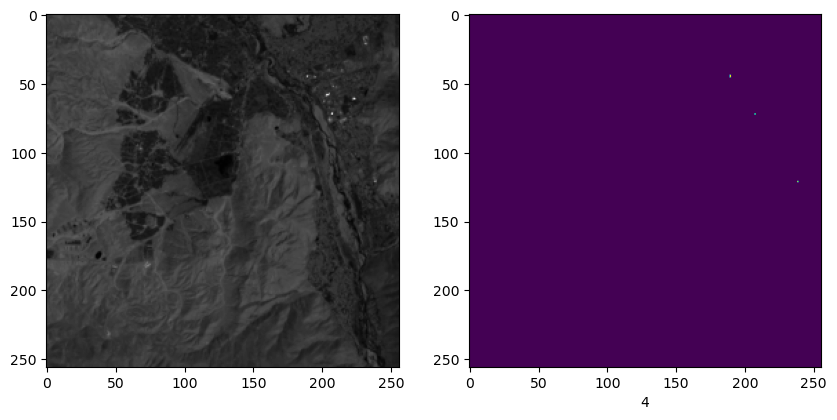

In [152]:
img_num = 666
image = rasterio.open('./dataset/test_img/'+tests[img_num]).read().transpose(1,2,0)[:,:,6]
fig, axs = plt.subplots(1,2)
fig.set_figheight(10)
fig.set_figwidth(10)
axs[0].imshow(image,cmap = 'gray')
axs[1].imshow(res[tests[img_num]])
axs[1].set_xlabel(res[tests[img_num]].sum())

In [153]:
joblib.dump(res, './y_pred.pkl')

['./y_pred.pkl']